In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from  math import sqrt
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error


In [91]:
from IPython.display import clear_output

In [92]:
df = pd.read_csv('C:/Users/Ariel/Desktop/main/Hackathon/Housing Dreams/house_train_raw.csv') 

In [93]:
df_test= pd.read_csv('C:/Users/Ariel/Desktop/Nueva carpeta/Hackathon/Housing Dreams/houses_test_raw.csv')

In [94]:
#se buscan los NULL or NA
df_test.isna().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [95]:
#Analisis de los datos
import sweetviz as sv
report = sv.analyze(df)
report.show_html("./report.html")

Feature: EnclosedPorch                       |████████▍ | [ 84%]   07:59 -> (01:30 left)
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:07 -> (00:00 left)


Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [96]:
#Analisis exploratorio de los datos
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [97]:
#Permite ver todas las Columnas/Filas
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [98]:
df.shape

(1460, 81)

In [99]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [101]:
df.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

valores con mas datos faltantes
PoolQC           1453 - Calidad de la piscina
MiscFeature      1406 - Características diversas no cubiertas en otras categorías
Alley            1369 - Tipo de callejón de acceso a la propiedad
Fence            1179 - Calidad de la cerca
FireplaceQu       690 -Calidad de la chimenea
LotFrontage       259 -Pies lineales de calle conectados a la propiedad

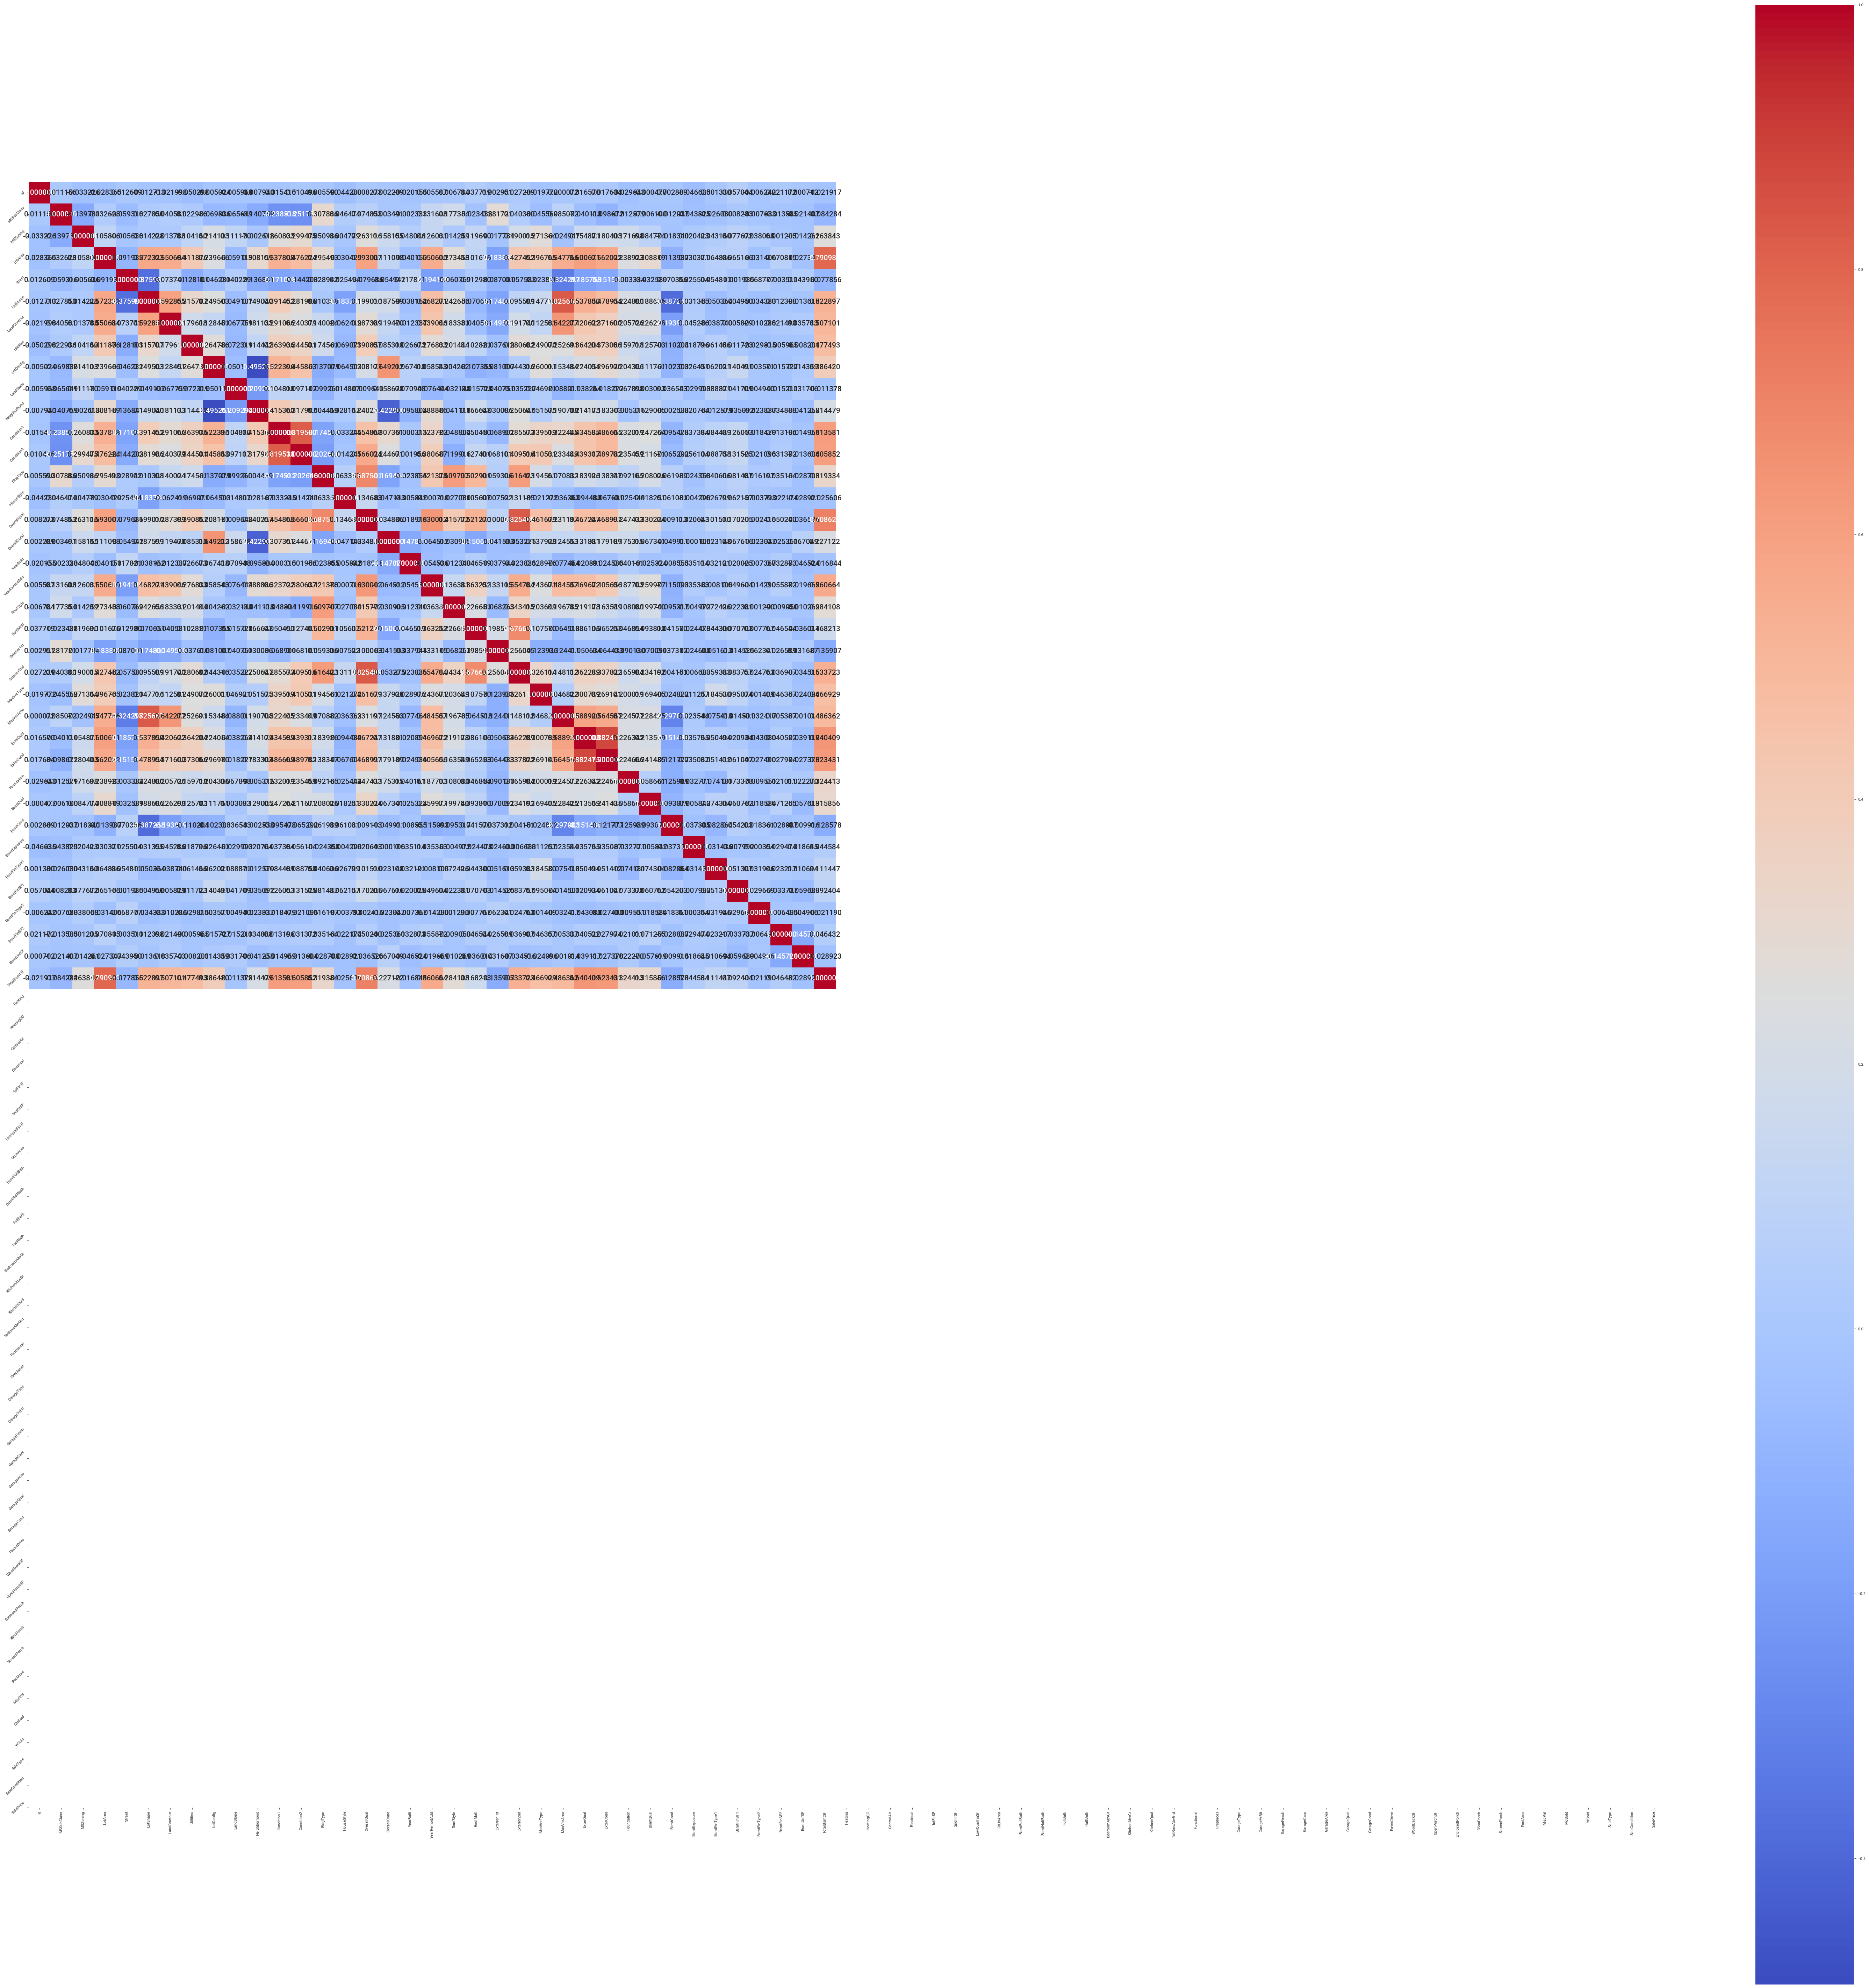

In [124]:
#Se busca las columnas con mejor realcion con SalePrice
corr = df.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']).corr()  #is used for find corelation
plt.figure(figsize=(75,75))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '2f',annot_kws={'size': 15},
           xticklabels= df.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']).columns, 
           yticklabels= df.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

In [103]:
#Columnas con relacion mas cercana a 1 con SalePrice sera X
dato_deter = ['LotArea','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']

In [104]:
X = df[dato_deter]

In [105]:
#Y es la columna objetivo
y = df.SalePrice

In [106]:
#Mdelo Arbol
modelo = DecisionTreeRegressor(random_state=1)

In [107]:
modelo.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [108]:
predictions = modelo.predict(X.head(1460))

In [109]:
np.savetxt("pred_test.csv", predictions, delimiter=",")

In [110]:
#RMSLE
from math import log
sumatoria=0
n=1459
for i in range(n):
    a=(log(predictions[i]+1) - log(df.SalePrice[i]+1))**2
    sumatoria=sumatoria+a
    final=(1/1459)*sumatoria

RMSLE=sqrt(final)
print(RMSLE)

0.0033597222328570348


In [111]:
#RMSLE
mean_squared_log_error(y, predictions, squared=False)


0.0033585714459649584

In [112]:
X = df[dato_deter]


In [113]:
# usamos los dos dataset train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [114]:
#Se usa KNN
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = 1022
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors)
rgr_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1022)

In [115]:
y_train_pred_knn = rgr_knn.predict(X_train)
y_test_pred_knn = rgr_knn.predict(X_test)
print('Error en datos de train:', mean_squared_log_error(y_train, y_train_pred_knn,squared=False))
print('Error en datos de test:', mean_squared_log_error(y_test, y_test_pred_knn,squared=False))

Error en datos de train: 0.40156944628945435
Error en datos de test: 0.4227429551514785


In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [117]:
X_train_scal = scaler.transform(X_train)  
X_test_scal = scaler.transform(X_test)  

In [118]:
n_neighbors = 1022
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors, weights='uniform')
rgr_knn.fit(X_train_scal,y_train)

KNeighborsRegressor(n_neighbors=1022)

In [119]:
y_train_pred_knn = rgr_knn.predict(X_train_scal)
y_test_pred_knn = rgr_knn.predict(X_test_scal)
print('Error en datos de train:', mean_squared_log_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_log_error(y_test, y_test_pred_knn))

Error en datos de train: 0.16125802019321894
Error en datos de test: 0.178711606130205


In [120]:
np.savetxt("pred_test.csv", y_train_pred_knn, delimiter=",")